# 통신사 고객 이탈 예측
https://www.kaggle.com/blastchar/telco-customer-churn


## 경쟁 설명
고객 유지를 위해 관련 고객 데이터를 분석하고 고객 보존프로그램을 개발

## 과정

1. 준비  
  1.1 라이브러리 임포트  
  1.2 데이터 가져오기
2. 데이터 탐색 및 전처리  
  2.1 각 요소의 유형,분포 파악 및 유형 코딩  
  2.2 결측치 확인 및 처리   
  2.3 이상치 확인 및 처리  
  2.4 시각화  
  2.5 상관관계 확인   
3. 데이터 모델링  
  3.1 의사결정나무 모델 적용  
  3.2 랜덤포레스트 적용  
  3.3 로지스틱 회귀 모델 적용
5. 평가

### 1. 준비
#### 1.1 라이브러리 임포트

In [1]:
import pandas as pd
import numpy as np

#시각화를 위한 라이브러리
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/WA_Fn-UseC_-Telco-Customer-Churn.csv


#### 1.2 데이터 가져오기


In [2]:
df=pd.read_csv("/kaggle/input/WA_Fn-UseC_-Telco-Customer-Churn.csv")

### 2. 데이터 탐색

#### 2.1 각 요소의 유형,분포 파악 및 유형 코딩

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**customerID**	고객 ID  
**gender** 성별 (여성, 남성)  
**SeniorCitizen**	노약자 여부 (1, 0)  
**Partner**	파트너가 있는지 여부 (예, 아니오)  
**Dependents**	부양 가족 여부 (예, 아니오)  
**tenure**	고객이 회사에 머물렀던 개월 수  
**PhoneService**	전화 서비스가 있는지 여부 (예, 아니요)  
**MultipleLines**	여러 회선을 사용하는지 여부 (예, 아니요, 전화 서비스 없음)  
**InternetService**	고객의 인터넷 서비스 제공 업체 (DSL, 광섬유, 아니요)  
**OnlineSecurity**	고객의 온라인 보안 여부 (예, 아니오, 인터넷 서비스 없음)  
**OnlineBackup**	고객이 온라인 백업을했는지 여부 (예, 아니요, 인터넷 서비스 없음)  
**DeviceProtection**	고객에게 기기 보호 기능이 있는지 여부 (예, 아니요, 인터넷 서비스 없음)  
**TechSupport**	기술 지원을 받았는지 여부 (예, 아니오, 인터넷 서비스 없음)  
**StreamingTV**	스트리밍 TV 보유 여부 (예, 아니요, 인터넷 서비스 없음)  
**StreamingMovies**	고객의 영화 스트리밍하 여부 (예, 아니요, 인터넷 서비스 없음)  
**Contract**	고객의 계약 기간 (월간, 1 년, 2 년)  
**PaperlessBilling**	종이없는 청구서 수신 여부 (예, 아니오)  
**PaymentMethod**	결제 수단 (전자 수표, 우편 수표, 은행 송금 (자동), 신용 카드 (자동))  
**MonthlyCharges**	매월 고객에게 청구되는 금액  
**TotalCharges**	고객에게 청구 된 총 금액  
**Churn**	이탈 여부 (예 또는 아니오)  

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

SeniorCitizen가 범주형 변수이나 int64 형태로 존재  
TotlaCharges는 수치형 변수이나 object 형태로 존재  
-> 각각에 적합한 형태로 변경 필요


In [5]:
c=0
for i in df['TotalCharges']:
    c=c+1
    if i==" ":
        print(c,i)

489  
754  
937  
1083  
1341  
3332  
3827  
4381  
5219  
6671  
6755  


TotalCharges의 값에 결측치가 공백' ' 형태로 존재하여 범주형태로 변경 불가  
-> 결측치가 있는 요소들은 유지개월이 0이므로 결측치를 0으로 대체

In [6]:
df['TotalCharges']=df['TotalCharges'].replace(" ",0)
df['TotalCharges']=df['TotalCharges'].astype('float64')
df['SeniorCitizen']=df['SeniorCitizen'].astype('object')

In [7]:
df.loc[df['gender'] =='Male', 'gender'] = "0"
df.loc[df['gender'] =='Female', 'gender'] = "1"

df.loc[df['Partner']=='Yes','Partner']="1"
df.loc[df['Partner']=='No','Partner']="0"

df.loc[df['Dependents']=='Yes','Dependents']="1"
df.loc[df['Dependents']=='No','Dependents']="0"

df.loc[df['PhoneService']=='Yes','PhoneService']="1"
df.loc[df['PhoneService']=='No','PhoneService']="0"

df.loc[df['MultipleLines']=='Yes','MultipleLines']="1"
df.loc[df['MultipleLines']=='No','MultipleLines']="0"
df.loc[df['MultipleLines']=='No phone service','MultipleLines']="2"

df.loc[df['InternetService']=='DSL','InternetService']="1"
df.loc[df['InternetService']=='Fiber optic','InternetService']="2"
df.loc[df['InternetService']=='No','InternetService']="0"

df.loc[df['OnlineBackup']=='Yes','OnlineBackup']="1"
df.loc[df['OnlineBackup']=='No','OnlineBackup']="0"
df.loc[df['OnlineBackup']=='No internet service','OnlineBackup']="2"

df.loc[df['OnlineSecurity']=='Yes','OnlineSecurity']="1"
df.loc[df['OnlineSecurity']=='No','OnlineSecurity']="0"
df.loc[df['OnlineSecurity']=='No internet service','OnlineSecurity']="2"

df.loc[df['DeviceProtection']=='Yes','DeviceProtection']="1"
df.loc[df['DeviceProtection']=='No','DeviceProtection']="0"
df.loc[df['DeviceProtection']=='No internet service','DeviceProtection']="2"

df.loc[df['TechSupport']=='Yes','TechSupport']="1"
df.loc[df['TechSupport']=='No','TechSupport']="0"
df.loc[df['TechSupport']=='No internet service','TechSupport']="2"

df.loc[df['StreamingTV']=='Yes','StreamingTV']="1"
df.loc[df['StreamingTV']=='No','StreamingTV']="0"
df.loc[df['StreamingTV']=='No internet service','StreamingTV']="2"

df.loc[df['StreamingMovies']=='Yes','StreamingMovies']="1"
df.loc[df['StreamingMovies']=='No','StreamingMovies']="0"
df.loc[df['StreamingMovies']=='No internet service','StreamingMovies']="2"

df.loc[df['Contract']=='Month-to-month','Contract']="0"
df.loc[df['Contract']=='One year','Contract']="1"
df.loc[df['Contract']=='Two year','Contract']="2"

df.loc[df['PaperlessBilling'] =='Yes', 'PaperlessBilling'] = "0"
df.loc[df['PaperlessBilling'] =='No', 'PaperlessBilling'] = "1"

df.loc[df['PaymentMethod'] =='Electronic check', 'PaymentMethod'] = "0"
df.loc[df['PaymentMethod'] =='Mailed check', 'PaymentMethod'] = "1"
df.loc[df['PaymentMethod'] =='Bank transfer (automatic)', 'PaymentMethod'] = "2"
df.loc[df['PaymentMethod'] =='Credit card (automatic)', 'PaymentMethod'] = "3"

df.loc[df['Churn']=='Yes','Churn']="1"
df.loc[df['Churn']=='No','Churn']="0"

#### 2.2 결측치 확인

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

결측치 처리 완료

#### 2.3 이상치 확인 및 처리

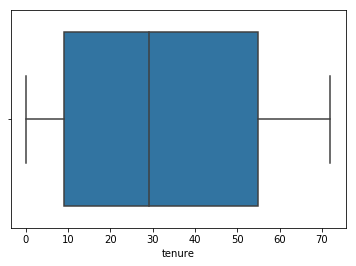

In [9]:
sns.boxplot(df['tenure']);

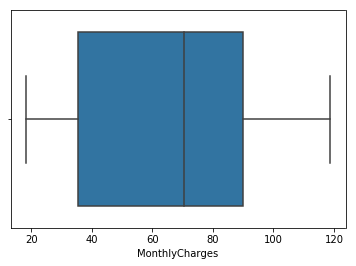

In [10]:
sns.boxplot(df['MonthlyCharges']);

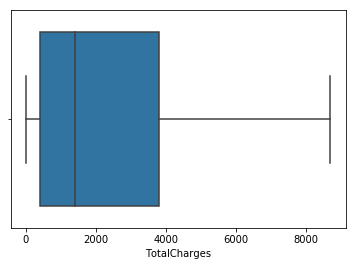

In [11]:
sns.boxplot(df['TotalCharges']);

### 2.4 시각화

#### 범주형 변수

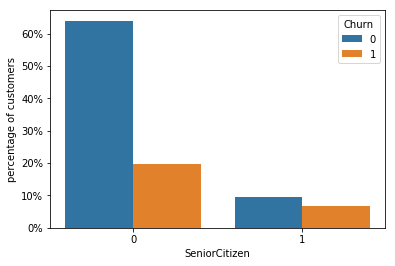

In [12]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = df.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
barplot_percentages("SeniorCitizen")

In [13]:
df.head()
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

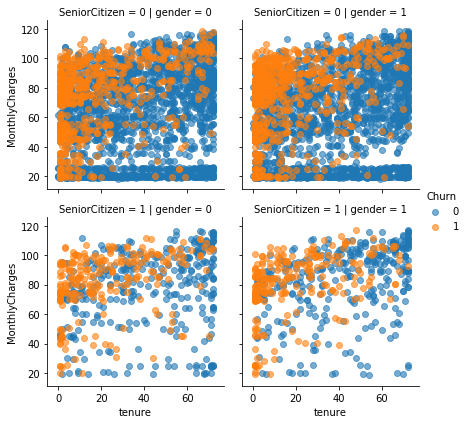

In [14]:
g = sns.FacetGrid(df, row='SeniorCitizen', col="gender", hue="Churn")
g.map(plt.scatter, "tenure", "MonthlyCharges", alpha=0.6)
g.add_legend();

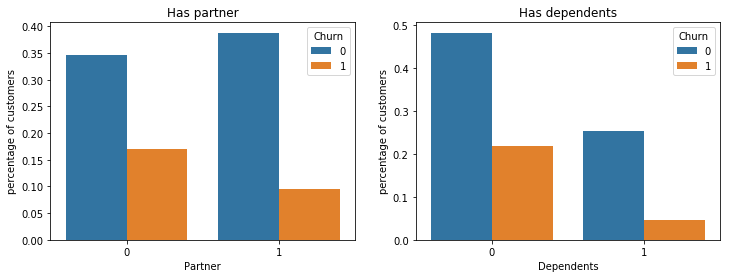

In [15]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"
# Plot Partner column
gp_partner = df.groupby('Partner')["Churn"].value_counts()/len(df)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
# Plot Dependents column
gp_dep = df.groupby('Dependents')["Churn"].value_counts()/len(df)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])

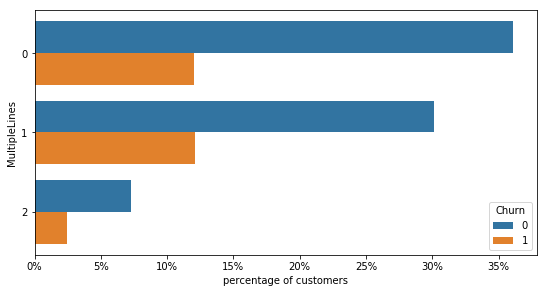

In [16]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("MultipleLines", orient='h')

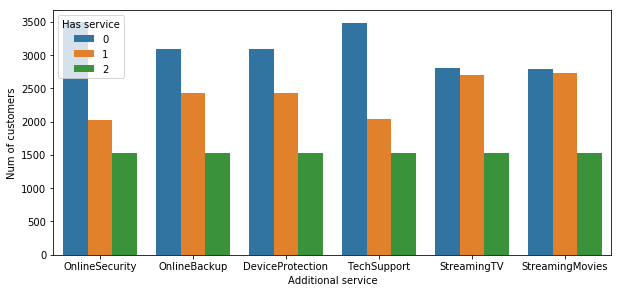

In [17]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(df[df["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

#### 숫자형 변수

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


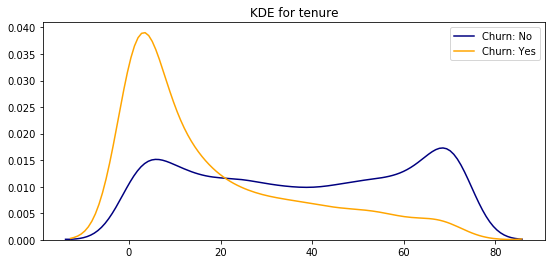

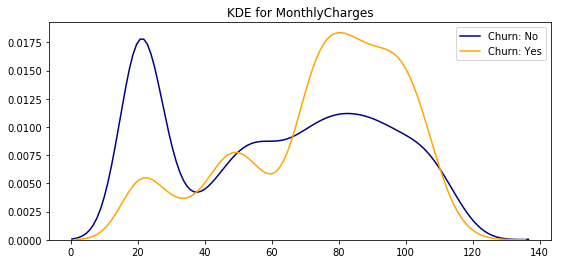

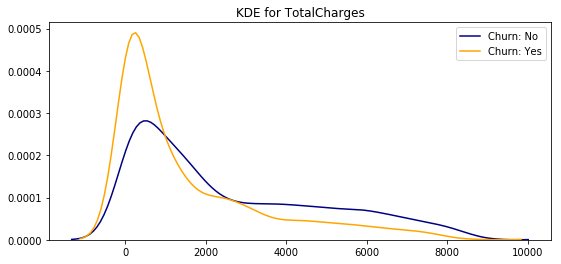

In [18]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == '0'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(df[df['Churn'] == '1'][feature].dropna(), color= 'orange', label= 'Churn: Yes')
    
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

#### 2.5 상관관계 확인

In [19]:
relation=df.corr()
relation

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.826178
MonthlyCharges,0.247900,1.000000,0.651174
TotalCharges,0.826178,0.651174,1.000000


In [20]:
train=df.head(5001)
test=df.tail(2032)

# train.to_csv("train.csv",index=False)
# test.to_csv("test.csv",index=False)

test2=test[["tenure",'InternetService']]

### 3. 데이터 모델링  
  #### 3.1 의사결정나무 모델 적용  

In [21]:
# predictors = ['SeniorCitizen', 'Partner', 'Dependents','tenure','InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']
predictors=["tenure",'InternetService']
 
x = train[predictors]
y = train["Churn"]

In [22]:
from sklearn.tree import DecisionTreeClassifier

decision = DecisionTreeClassifier().fit(x,y)
print(decision)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


#### 3.2 랜덤포레스트 적용

In [23]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_jobs=-1).fit(x,y)
print(forest)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [24]:
from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold

decision_score = cross_val_score(decision, x, y, cv=5).mean()
forest_score = cross_val_score(forest, x, y, cv=5).mean()


print("DecisionTree = {0:.6f}".format(decision_score))
print("RandomForest = {0:.6f}".format(forest_score))

DecisionTree = 0.789834
RandomForest = 0.785835


In [25]:
prediction=decision.predict(test2)
submission = pd.DataFrame({
        "customerID": test["customerID"],
        "Churn_test": test["Churn"],
        "Churn_predict": prediction
    })
submission.loc[submission['Churn_predict']==submission['Churn_test'],'Predict']=1
submission.loc[submission['Churn_predict']!=submission['Churn_test'],'Predict']=0

# submission.to_csv('submission.csv', index=False)

print("predict percent is %.2f %%"%(sum(submission['Predict'])/len(submission)*100))

predict percent is 79.43 %


#### 3.3 로지스틱 회귀모델

In [26]:
from sklearn.linear_model import LogisticRegression 
from sklearn.cross_validation import train_test_split 

X=df[["MonthlyCharges","TotalCharges",'tenure']]
Y=df['Churn'] 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

log_clf = LogisticRegression()
log_clf.fit(X_train,Y_train)
log_clf.score(X_test, Y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.7908187411263606

In [27]:
test3=test[["MonthlyCharges","TotalCharges","tenure"]]
# test3=test["MonthlyCharges"]

p=log_clf.predict(test3)
submission_log = pd.DataFrame({
        "customerID": test["customerID"],
        "Churn_test": test["Churn"],
        "Churn_predict": prediction
    })
submission_log.loc[submission['Churn_predict']==submission['Churn_test'],'Predict']=1
submission_log.loc[submission['Churn_predict']!=submission['Churn_test'],'Predict']=0

# submission_log.to_csv('submission_log.csv', index=False)

print("predict percent is %.2f %%"%(sum(submission_log['Predict'])/len(submission)*100))

predict percent is 79.43 %


### 4. 평가


의사결정나무 : 78.98%  
랜덤포레스트 : 78.42%  
로지스틱회귀 : 79.43%  

**-> 주어진 데이터 셋에서 로지스틱회귀 모델이 79.43%로 가장 높은 예측률을 보였으나 세 개의 모델 모두 78~80% 사이의 예측률을 보임 **